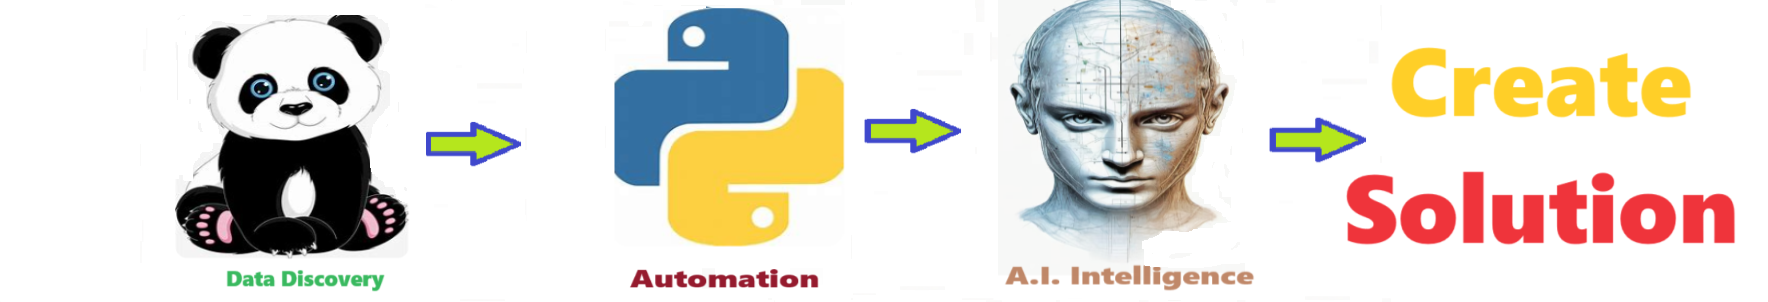

# Create Solution 
1. Create Solution Directory
2. Copies Template to Directory
3. Renames template to Solution
4. documents workflow steps
5. Define what Branding to use
6. Add solution to solution registry
7. Generate readme.md file
8. Generate movie script
9. Generate PPT File
10. Intiates Git
11. Publishes to Github
12. Publishes to Youtube
 
#### by Joe Eberle started on 05-23-2023 - https://github.com/JoeEberle/ - josepheberle@outlook.com

In [1]:
import os
import schedule
from datetime import datetime
import pandas as pd
import subprocess
import shutil
import time
import zipfile
print(f"Libraries Imported succesfully on {datetime.now().date()} at {datetime.now().time()}") 

Libraries Imported succesfully on 2024-04-05 at 14:37:44.761147


## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [2]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  
solution_name = 'create_solution'

## Optional Step 0 - Intitiate Logging and debugging 

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 

Process create_solution Step 0 - Initializing and starting Logging Process.


In [65]:
path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.xlsx"
df_solution_registry = pd.read_excel(path_to_solutions_registry) 
print(f"The are {df_solution_registry.shape[0]} registered solutions") 
df_solution_registry.head(2) 

The are 81 registered solutions


,solution_name,solution_directory,solution_definition
0,Ai Prompt Response Generator,ai_prompt_response_generator,Allows you to embed and record AI solutions su...
1,Archival Automation,archival_automation,Solution for Archival Automation


In [61]:
def add_new_solution_to_registry(df, solution_name, solution_directory, solution_definition):
    """ Add a new row to an existing DataFrame .  """
    new_index = len(df)
    df.loc[new_index] = [solution_name, solution_directory, solution_definition]
    return df

In [5]:
path_to_solution_library = "c:\\users\\josep\\" 
path_to_solution_template = "c:\\users\\josep\\solution_template" 

In [29]:
def generate_readme_intro(solution_name, solution_description, target_directory):
    solution_name = solution_name.replace('_',' ').title()
    return f"""
# {solution_name} - {solution_description}

![Code Logo](code.png)
## Description

Welcome to the solution {solution_name} - an example for your projects

{solution_description}
    """

In [28]:
def generate_readme_solution_features():
    return f"""
## Features
- Easy to understand and use  
- Easily Configurable 
- Quickly start your project with pre-built templates
- Its Fast and Automated
    """

In [8]:
def generate_readme_instructions():
    return f"""
## Getting Started
To get started with the {solution_name} solution, follow these steps:
1. Clone the repository to your local machine.
2. Install the required dependencies listed at the top of the notebook.
3. Explore the example code provided in the repository and experiment.
4. Run the notebook and your find your most Critical Data - EASY !
    """

In [9]:
def generate_readme_notebook_features():
    return f"""
## Notebook Features
- Self Documenting 
- Self Testing 
- Easily Configurable
- Includes Talking Code - The code explains itself
- Self Logging 
- Self Debugging 
- Low Code - or - No Code
- Educational 
    """

In [10]:
def generate_readme_branding():
    return f"""
![Code Logo](developer.png)
    """

In [27]:
def generate_readme(solution_name, solution_description, target_directory):
    """ Generate a readme.md file.   """
    solution_name = solution_name.replace('_',' ').title()
    readme_content = generate_readme_intro(solution_name, solution_description, target_directory)
    readme_content += generate_readme_solution_features()  
    readme_content += generate_readme_notebook_features()  
    readme_content += generate_readme_branding()     

    if not os.path.exists(target_directory):      # Create the target directory if it doesn't exist
        os.makedirs(target_directory)

    readme_path = os.path.join(target_directory, 'readme.md')     # Specify the path for the readme.md file

    with open(readme_path, 'w') as f:      # Write the template to the readme.md file
        f.write(readme_content)

    result = f"{readme_path}'" 
    return result 

In [12]:
def initialize_solution_git(new_solution_name, solution_path="C:\\users\\josep\\"):
    """ Initialize a Git repository for a solution.  """
    commit_date = datetime.today().strftime('%Y-%m-%d')
    project_full_path = solution_path + new_solution_name + '\\'
    remote_git_location = f"https://github.com/JoeEberle/{new_solution_name}.git"
    
    subprocess.run(["git", "-C", project_full_path, "init"])  
    subprocess.run(["git", "-C", project_full_path, "add", "."])    
    subprocess.run(["git", "-C", project_full_path, "commit", "-m", f"Automated {commit_date} commit"])
    subprocess.run(["git", "-C", project_full_path, "branch", "-m", "main"])  # Set default branch to main
    subprocess.run(["git", "-C", project_full_path, "remote", "add", "origin", remote_git_location])    
    subprocess.run(["git", "-C", project_full_path, "push", "-u", "origin", "main"])  # Set default branch to main
    
    git_init_status = f"Initialized project git folder: {solution_name} repository"  
    print(git_init_status) 
    return git_init_status

In [59]:
def create_solution(new_solution_name, new_solution_definition, path_to_solution_library,path_to_solution_template, overwrite = None):
    ''' Clone a solution template to kick start a new solution '''
    path_to_new_solution = path_to_solution_library + new_solution_name + "\\"
    if os.path.exists(path_to_new_solution) and os.path.isdir(path_to_new_solution):
        task_progress = f"Cannot create solution that already has directory:\n{path_to_new_solution} " 
    else:
        shutil.copytree(path_to_solution_template, path_to_new_solution)
        task_progress = f"1. Created directory: {path_to_new_solution} \n"
        task_progress += f"2. Created solution Template \n"    
        new_solution_notebook_name  = f"{path_to_new_solution}\\{new_solution_name}.ipynb"
        os.rename(path_to_new_solution+"\\"+"solution_template.ipynb", new_solution_notebook_name)
        task_progress += f"3.1 Renamed solution to:{new_solution_name}.ipynb \n"           
        new_solution_image_name  = f"{path_to_new_solution}\\{new_solution_name}.png"        
        os.rename(path_to_new_solution+"\\"+"solution_template.png", path_to_new_solution+"\\"+new_solution_name + ".png")
        task_progress += f"3.2 Renamed image to: {new_solution_name}.png \n"          
        readme_result = generate_readme(new_solution_name, new_solution_definition, path_to_new_solution)
        task_progress += f"4. Generated Readme to:\n{readme_result} \n"     
        initialize_solution_git(new_solution_name, path_to_solution_library) 
        task_progress += f"5. Intitialized GIT for:\n{path_to_new_solution} \n"  
        task_progress += f"Create solution steps completed \n" 
    status = task_progress 
    
    return task_progress


In [55]:
new_solution_name = "automating_windows_task_scheduler" 
new_solution_description = "This solution automates creating python script to run in windows task scheduler."
print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))


Cannot create solution that already has directory:
c:\users\josep\automating_windows_task_scheduler\ 


In [68]:
path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.xlsx"
new_solution_name = "cancer_treatment_modalities" 
new_solution_description = "Analysis of major treatment modalities and the cancers (tumors type) they treat"
print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
df_solution_registry = add_new_solution_to_registry(df_solution_registry, new_solution_name, new_solution_name, new_solution_description)
print(f"6. Added new solution to registry \n")   

Initialized project git folder: create_solution repository
1. Created directory: c:\users\josep\cancer_treatment_modalities\ 
2. Created solution Template 
3.1 Renamed solution to:cancer_treatment_modalities.ipynb 
3.2 Renamed image to: cancer_treatment_modalities.png 
4. Generated Readme to:
c:\users\josep\cancer_treatment_modalities\readme.md' 
5. Intitialized GIT for:
c:\users\josep\cancer_treatment_modalities\ 
Create solution steps completed 

6. Added new solution to registry 



In [70]:
path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.xlsx"
new_solution_name = "cancer_treatment_side_effects" 
new_solution_description = "quantifying of side affects associated with major treatment modalities"
print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
df_solution_registry = add_new_solution_to_registry(df_solution_registry, new_solution_name, new_solution_name, new_solution_description)
print(f"6. Added new solution to registry \n")  

Initialized project git folder: create_solution repository
1. Created directory: c:\users\josep\cancer_treatment_side_effects\ 
2. Created solution Template 
3.1 Renamed solution to:cancer_treatment_side_effects.ipynb 
3.2 Renamed image to: cancer_treatment_side_effects.png 
4. Generated Readme to:
c:\users\josep\cancer_treatment_side_effects\readme.md' 
5. Intitialized GIT for:
c:\users\josep\cancer_treatment_side_effects\ 
Create solution steps completed 

6. Added new solution to registry 



In [70]:
path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.xlsx"
new_solution_name = "cancer_treatment_side_effects" 
new_solution_description = "quantifying of side affects associated with major treatment modalities"
print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
df_solution_registry = add_new_solution_to_registry(df_solution_registry, new_solution_name, new_solution_name, new_solution_description)
print(f"6. Added new solution to registry \n")  

Initialized project git folder: create_solution repository
1. Created directory: c:\users\josep\cancer_treatment_side_effects\ 
2. Created solution Template 
3.1 Renamed solution to:cancer_treatment_side_effects.ipynb 
3.2 Renamed image to: cancer_treatment_side_effects.png 
4. Generated Readme to:
c:\users\josep\cancer_treatment_side_effects\readme.md' 
5. Intitialized GIT for:
c:\users\josep\cancer_treatment_side_effects\ 
Create solution steps completed 

6. Added new solution to registry 



In [69]:
path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.xlsx"
new_solution_name = "patient_cancer_risk_index" 
new_solution_description = "Calculated index of ANY patients point in time risk of developing ANY form of cancer"
print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
df_solution_registry = add_new_solution_to_registry(df_solution_registry, new_solution_name, new_solution_name, new_solution_description)
print(f"6. Added new solution to registry \n")   

Initialized project git folder: create_solution repository
1. Created directory: c:\users\josep\cancer_survival_index\ 
2. Created solution Template 
3.1 Renamed solution to:cancer_survival_index.ipynb 
3.2 Renamed image to: cancer_survival_index.png 
4. Generated Readme to:
c:\users\josep\cancer_survival_index\readme.md' 
5. Intitialized GIT for:
c:\users\josep\cancer_survival_index\ 
Create solution steps completed 

6. Added new solution to registry 



In [73]:
path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.xlsx"
new_solution_name = "cancer_staging" 
new_solution_description = "Calculated stage of cancer - Brigham Young T-N-M  Tumer-Nodes-Metasticies"
print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
df_solution_registry = add_new_solution_to_registry(df_solution_registry, new_solution_name, new_solution_name, new_solution_description)
print(f"6. Added new solution to registry \n")   

Initialized project git folder: create_solution repository
1. Created directory: c:\users\josep\cancer_staging\ 
2. Created solution Template 
3.1 Renamed solution to:cancer_staging.ipynb 
3.2 Renamed image to: cancer_staging.png 
4. Generated Readme to:
c:\users\josep\cancer_staging\readme.md' 
5. Intitialized GIT for:
c:\users\josep\cancer_staging\ 
Create solution steps completed 

6. Added new solution to registry 



In [72]:
path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.xlsx"
new_solution_name = "term_frequency_inverse_document_frequency" 
new_solution_description = "TF-IDF helps identify important terms within a document by giving higher weights to terms that are frequent in the document but rare in the corpus"
print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
df_solution_registry = add_new_solution_to_registry(df_solution_registry, new_solution_name, new_solution_name, new_solution_description)
print(f"6. Added new solution to registry \n")   

Initialized project git folder: create_solution repository
1. Created directory: c:\users\josep\term_frequency_inverse_document_frequency\ 
2. Created solution Template 
3.1 Renamed solution to:term_frequency_inverse_document_frequency.ipynb 
3.2 Renamed image to: term_frequency_inverse_document_frequency.png 
4. Generated Readme to:
c:\users\josep\term_frequency_inverse_document_frequency\readme.md' 
5. Intitialized GIT for:
c:\users\josep\term_frequency_inverse_document_frequency\ 
Create solution steps completed 

6. Added new solution to registry 



In [69]:
path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.xlsx"
new_solution_name = "quality_of_life_index" 
new_solution_description = "Calculated index of monthly life quality from initial (denovo) diagnosis of major disease"
print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
df_solution_registry = add_new_solution_to_registry(df_solution_registry, new_solution_name, new_solution_name, new_solution_description)
print(f"6. Added new solution to registry \n")   

Initialized project git folder: create_solution repository
1. Created directory: c:\users\josep\cancer_survival_index\ 
2. Created solution Template 
3.1 Renamed solution to:cancer_survival_index.ipynb 
3.2 Renamed image to: cancer_survival_index.png 
4. Generated Readme to:
c:\users\josep\cancer_survival_index\readme.md' 
5. Intitialized GIT for:
c:\users\josep\cancer_survival_index\ 
Create solution steps completed 

6. Added new solution to registry 



In [69]:
path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.xlsx"
new_solution_name = "quality_of_life_index" 
new_solution_description = "Calculated index of monthly life quality from initial (denovo) diagnosis of major disease"
print(create_solution(new_solution_name, new_solution_description,path_to_solution_library, path_to_solution_template))
df_solution_registry = add_new_solution_to_registry(df_solution_registry, new_solution_name, new_solution_name, new_solution_description)
print(f"6. Added new solution to registry \n")   

Initialized project git folder: create_solution repository
1. Created directory: c:\users\josep\cancer_survival_index\ 
2. Created solution Template 
3.1 Renamed solution to:cancer_survival_index.ipynb 
3.2 Renamed image to: cancer_survival_index.png 
4. Generated Readme to:
c:\users\josep\cancer_survival_index\readme.md' 
5. Intitialized GIT for:
c:\users\josep\cancer_survival_index\ 
Create solution steps completed 

6. Added new solution to registry 



In [67]:
df_solution_registry = add_new_solution_to_registry(df_solution_registry, new_solution_name, new_solution_name, new_solution_description)
print(f"6. Added new solution to registry \n")   

path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.xlsx"
df_solution_registry.to_excel(path_to_solutions_registry) 
print(f"The are {df_solution_registry.shape[0]} registered solutions") 

6. Added new solution to registry 

The are 83 registered solutions


In [71]:
path_to_solutions_registry = "c://users//josep//solution_registry//solution_registry.xlsx"
df_solution_registry.to_excel(path_to_solutions_registry) 
print(f"The are {df_solution_registry.shape[0]} registered solutions") 

The are 86 registered solutions


In [ ]:
import subprocess

def get_git_inventory():
    try:
        # Run 'git ls-files' command and capture output
        result = subprocess.run(['git', 'ls-files'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        
        # Check if the command was successful
        if result.returncode == 0:
            # Split output into lines and return as a list
            return result.stdout.splitlines()
        else:
            # Print error message if the command failed
            print("Error:", result.stderr)
            return None
    except Exception as e:
        print("An error occurred:", e)
        return None

# Get current inventory in the Git repository
inventory = get_git_inventory()
if inventory is not None:
    print("Current inventory:")
    for item in inventory:
        print(item)


In [50]:
df_solution_registry.head(2)

,solution_name,solution_directory,solution_definition
0,Ai Prompt Response Generator,ai_prompt_response_generator,Allows you to embed and record AI solutions su...
1,Archival Automation,archival_automation,Solution for Archival Automation


In [ ]:
target_inventory_directory = 'C:\\users\\josep\\inventory_your_python\\'
target_file_name = target_inventory_directory + 'file_inventory.xlsx'
df_file_inventory = pd.read_excel(target_file_name, index_col = False) 
print(f"found {df_file_inventory.shape[1]} solutions") 
df_file_inventory.head(5) 

## create solution templates for every notebook - initialize .git and establish readme.md 

In [ ]:
solution_directories = df_file_inventory.solution_directory.unique() 
path_to_solution_library
for idx, new_solution_name in enumerate(solution_directories):
    new_solution_definition = df_file_inventory.solution_definition.iloc[idx]  
    solution_directory = path_to_solution_library + new_solution_name
    print(f"\n\n{idx}: {new_solution_name} Def: {new_solution_definition} ")
    print(f"Dir: {solution_directory} ")
    create_solution(new_solution_name,new_solution_definition, path_to_solution_library, path_to_solution_template)

In [ ]:
import os
import shutil

def copy_file(source_directory, source_filename, target_directory, new_file_name):
    # Construct the paths for the source and target files
    source_file_path = os.path.join(source_directory, source_filename)
    target_file_path = os.path.join(target_directory, new_file_name)

    try:
        # Copy the file to the target directory with the new file name
        shutil.copy(source_file_path, target_file_path)
        print(f"File '{source_filename}' copied successfully to '{target_directory}' with new name '{new_file_name}'.")
    except FileNotFoundError:
        print(f"Error: The file '{source_filename}' does not exist in '{source_directory}'.")
    except shutil.SameFileError:
        print(f"Error: Source and target files are the same.")

 


In [ ]:
source_directory = "C:/infrastructure/jupyter_notebook" 
target_solution_library ="c:/users/josep/" 

notebook_filenames = df_file_inventory.filename.unique() 
 
for idx, notebook_filename in enumerate(notebook_filenames):
    new_filename = 'v01_' + notebook_filename.strip().lower().replace(' ','_') 
    target_directory = target_solution_library + df_file_inventory.solution_directory.iloc[idx]  
    copy_file(source_directory, notebook_filename, target_directory, new_filename)


## create solution templates for every notebook - initialize .git and establish readme.md 

## Step 0 - Process End - display log

In [ ]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

Term Frequency-Inverse Document Frequency (TF-IDF) is a statistical measure used in information retrieval and text mining to evaluate the importance of a term in a document relative to a collection of documents (corpus). The benefit of TF-IDF lies in its ability to highlight terms that are both frequent within a document and rare across the entire corpus, thus identifying key terms that are highly relevant to the content of a document.

Here are some of the main benefits of TF-IDF:

1. **Highlighting Important Terms**: TF-IDF helps identify important terms within a document by giving higher weights to terms that are frequent in the document but rare in the corpus. This helps distinguish between terms that are central to the document's content and terms that are common across many documents.

2. **Reducing Noise**: By downweighting terms that are common across the corpus (e.g., stop words like "the", "and", "is"), TF-IDF reduces the influence of noise in the data and focuses attention on terms that are more meaningful and informative.

3. **Improving Search Relevance**: TF-IDF is commonly used in search engines to rank documents based on their relevance to a user query. Documents containing terms that are both relevant to the query and unique within the corpus are given higher rankings.

4. **Handling Varied Document Lengths**: TF-IDF accounts for variations in document lengths by normalizing the term frequency by the total number of terms in the document. This ensures that longer documents do not disproportionately influence the importance of terms.

5. **Flexibility and Interpretability**: TF-IDF is a simple and intuitive measure that can be easily implemented and understood. It provides a clear indication of the importance of terms within documents, making it valuable for tasks such as document classification, clustering, and summarization.

Overall, TF-IDF is a powerful technique for analyzing text data and extracting meaningful insights by identifying and prioritizing terms based on their relevance and uniqueness within a corpus.

#### https://github.com/JoeEberle/ -- josepheberle@outlook.com